<center> <b>UCGIS I-GUIDE Community Champion Project</b> </center>


# Geomasking Sensitive Individual-level Data to Protect Location Privacy
<i>Yue Lin</i>

This Jupyter notebook demonstrates how geomasking techniques can be used to protect the location privacy of individuals when releasing sensitive data. **More discussion about location privacy can be found in [Kerski, J. (2016)](http://dx.doi.org/10.22224/gistbok/2016.3.2)**.

## Notebook Outline
- [Introduction](#intro)
- [Geomasking Methods](#geomasking)
    - [Affine Transformation](#geomasking1)
    - [Random Perturbation](#geomasking2)
    - [Gaussian Perturbation](#geomasking3)
- [References](#ref)

<a id='intro'></a>
## Introduction
Location privacy is an individual right that prevents a person from being identified based on his or her geographic location. Geomasking methods, which alter the geographic location of an individual to protect confidentiality, are often applied before releasing individual-level data. In this notebook, we demonstrate how geomasking techniques can be used to protect privacy by providing hands-on examples and code.

We use a synthetic individual-level population data set from Guernsey County, Ohio to illustrate the use of geomasking methods. This data set contains 40,087 individual records across over 2,000 census blocks. We begin by importing and mapping this test data set as shown below. The blue dots on the map represent hypothetical original individual locations.

PROJ: proj_create_from_database: Cannot find proj.db


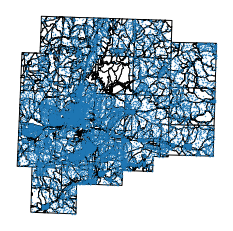

In [1]:
import pandas as pd
import geopandas as gpd

filename_poly = 'data/tl_2020_39059_tabblock10.shp'
poly = gpd.read_file(filename_poly)
poly = poly.to_crs('EPSG:3395')

filename_df = 'data/guernsey_data.csv'
df = pd.read_csv(filename_df)
df['Block'] = df['Block'].astype(str)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.lon, y=df.lat)).set_crs('EPSG:4326')
gdf = gdf.to_crs('EPSG:3395')

base = poly.plot(color='white', edgecolor='black')
ax = gdf.plot(ax=base, markersize=0.1) 
ax.set_axis_off()

We can zoom in and focus on Block 390599773001005.

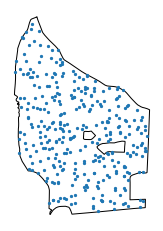

In [2]:
blockid = poly.loc[[1610],'GEOID10'].to_list()[0]

base = poly.loc[[1610],'geometry'].plot(color='white', edgecolor='black')
ax = gdf[gdf['Block'] == blockid].plot(ax=base, markersize=5) 
ax.set_axis_off()

<a id='geomasking'></a>
## Geomasking Methods

Various geographic masking techniques have been developed over the years. All of these include some level of randomization to reduce the probability of identifying an individual based on his or her geographic locations. We here demonstrate the use of five commonly used geomasking techniques: affine transformations, random perturbation, Gaussian perturbation, donut masking, and location swapping.

<a id='geomasking1'></a>
### Affine Transformation
Affine transformation is a class of methods that deterministically move individual locations to a new set of locations through translation, change in scale, and rotation[<sup>1</sup>](#fn1).

<a id='geomasking2'></a>
### Random Perturbation
Adding randomized noise to the original coordinates is a common way to protect the location privacy of individual-level data[<sup>2</sup>](#fn2). Each point location can be placed at random within a circle with a center at the original point and a radius defined by the user, or within any other polygon defined relative to the original point. We here illustrate the use of perturbation circle for privacy protection.

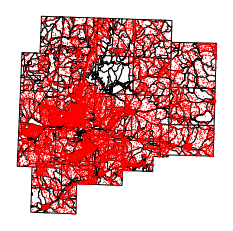

In [3]:
import random
from shapely.geometry import Point

radius = 50     # user-defined radius

def get_random_point_in_polygon(buf):
    minx, miny, maxx, maxy = buf.bounds
    while True:
        p = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if buf.contains(p):
            return p

gdf_rp = gdf.copy()
buf = gdf_rp.buffer(radius)
for index, row in buf.iteritems():
    new_pt = get_random_point_in_polygon(row)
    gdf_rp.at[index, 'geometry'] = new_pt

base = poly.plot(color='white', edgecolor='black')
ax = gdf_rp.plot(ax=base, markersize=0.1, color='red') 
ax.set_axis_off()

Zooming in to Block 390599773001005:

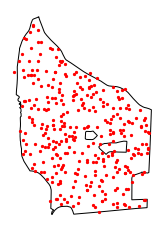

In [4]:
base = poly.loc[[1610],'geometry'].plot(color='white', edgecolor='black')
ax = gdf_rp[gdf_rp['Block'] == blockid].plot(ax=base, markersize=5, color='red') 
ax.set_axis_off()

<a id='geomasking2'></a>
### Gaussian Perturbation

<a id='ref'></a>
## References
<span id="fn1"> Armstrong, M. P., Rushton, G., & Zimmerman, D. L. (1999). Geographically masking health data to preserve confidentiality. Statistics in medicine, 18(5), 497-525. </span>

<span id="fn2"> Kwan, M. P., Casas, I., & Schmitz, B. (2004). Protection of geoprivacy and accuracy of spatial information: How effective are geographical masks?. Cartographica: The International Journal for Geographic Information and Geovisualization, 39(2), 15-28. </span>